In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
url = "/Users/enial/OneDrive/Escritorio/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)

In [3]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [6]:
# Calculamos la frecuencia de cada categoría
frecuency_categ = df['category'].value_counts()

# Seleccionamos las 5 categorías más frecuentes
top_5_category = frecuency_categ.head(5)
top_5_category


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

C:\Users\enial\AppData\Local\Temp\ipykernel_4412\2224713508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_category.index, y=top_5_category.values, palette='viridis')


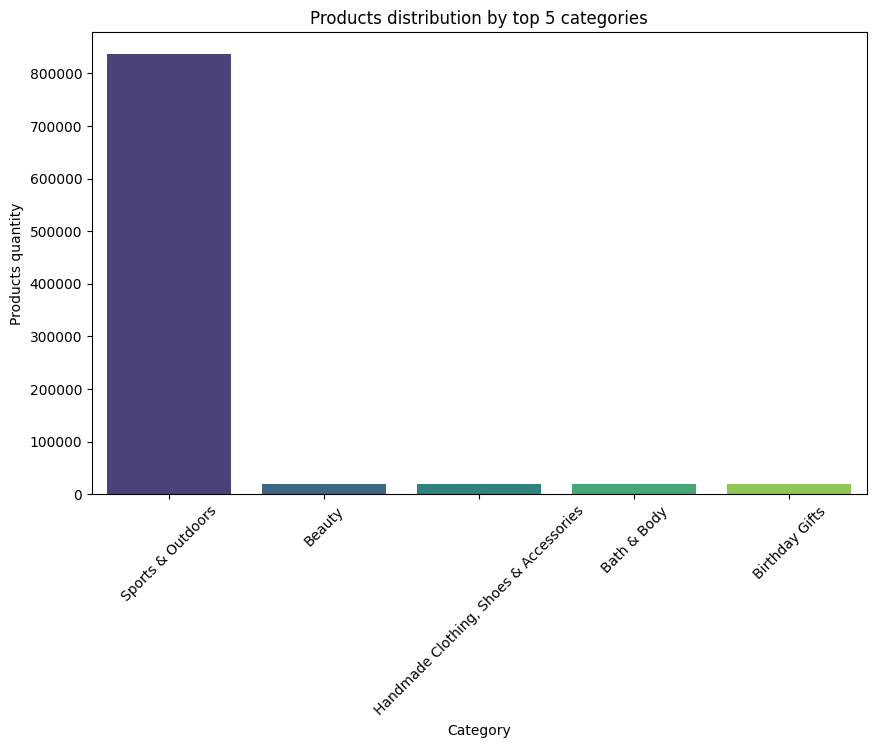

In [7]:
# Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_category.index, y=top_5_category.values, palette='viridis')
plt.title('Products distribution by top 5 categories')
plt.xlabel('Category')
plt.ylabel('Products quantity')
plt.xticks(rotation=45)
plt.show()


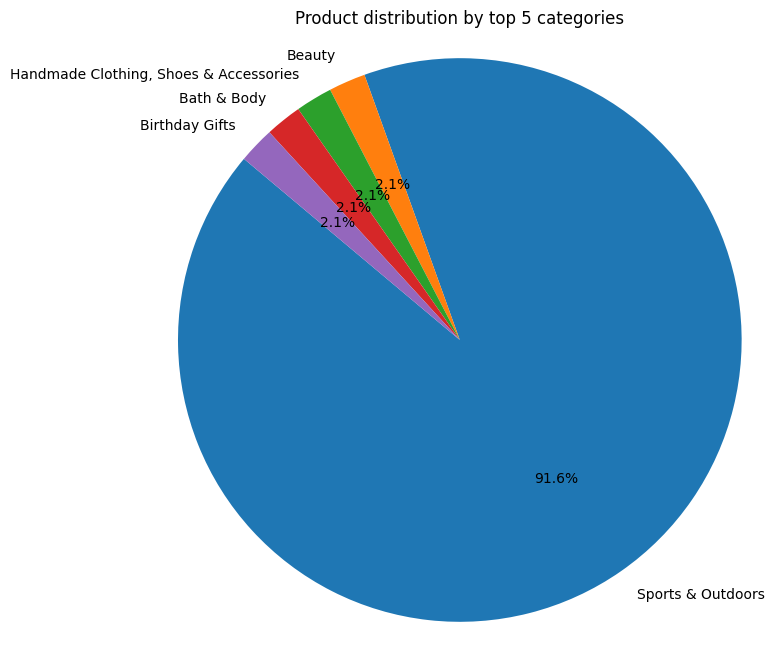

In [8]:
# Creamos un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(top_5_category, labels=top_5_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Product distribution by top 5 categories')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()


In [9]:
# Calculamos la media, mediana y moda del precio de los productos
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")


Mean: 89.24380943923663
Median: 19.09
Mode: 9.99


In [10]:
var_price = df['price'].var()
std_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
# Calcular el rango intercuartil (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR_price = Q3 - Q1

print(f"Variance: {var_price}") 
print(f"Standard deviation: {std_price}") 
print(f"Range: {range_price}") 
print(f"IQR: {IQR_price}")

Variance: 119445.48532254907
Standard deviation: 345.60886175349884
Range: 100000.0
IQR: 36.0


In [11]:
"Considering that the mean is 89.24€ and the standard deviation is almost 4 times the mean, we could say that the the spread is quite large. We can see also this in the range, that it is very big (100000)."

'Considering that the mean is 89.24€ and the standard deviation is almost 4 times the mean, we could say that the the spread is quite large. We can see also this in the range, that it is very big (100000).'

In [12]:
"However, the combination of a small IQR and a very large range suggests that, although the majority of the data is concentrated and has little dispersion, there are outliers that are far removed from the rest and widen the overall range significantly. We can rely more on the latter measure (IQR), since the IQR is a robust measure of dispersion that is not affected by extreme values."

'However, the combination of a small IQR and a very large range suggests that, although the majority of the data is concentrated and has little dispersion, there are outliers that are far removed from the rest and widen the overall range significantly. We can rely more on the latter measure (IQR), since the IQR is a robust measure of dispersion that is not affected by extreme values.'

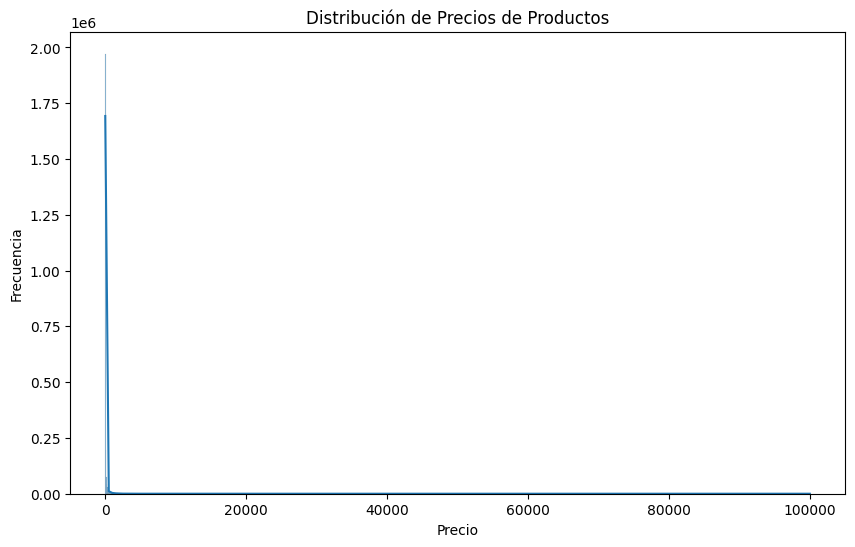

In [13]:
num_bins = int(np.ceil(np.sqrt(len(df['price']))))

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=num_bins, kde=True)
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


In [14]:
"This histogram is difficult to read because there are outliers. We could filter these outliers or use a logarithmic scale"

'This histogram is difficult to read because there are outliers. We could filter these outliers or use a logarithmic scale'

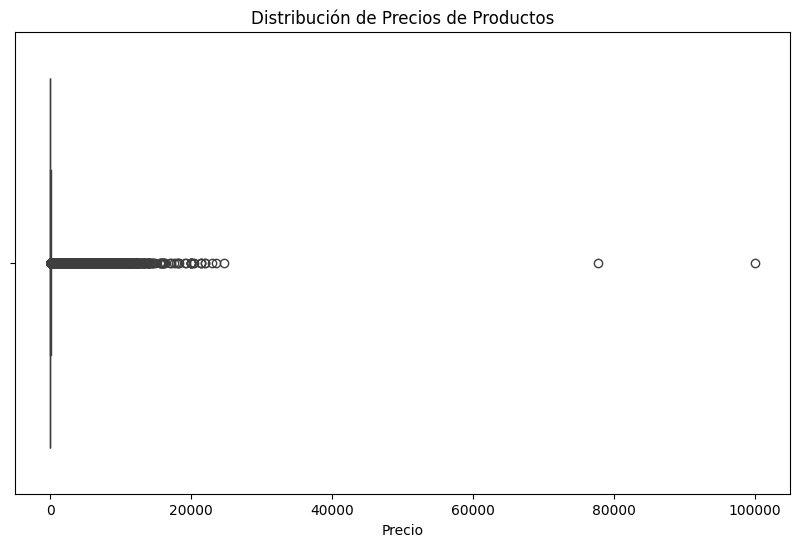

In [15]:
# Gráfico de box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.show()


c:\Users\enial\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


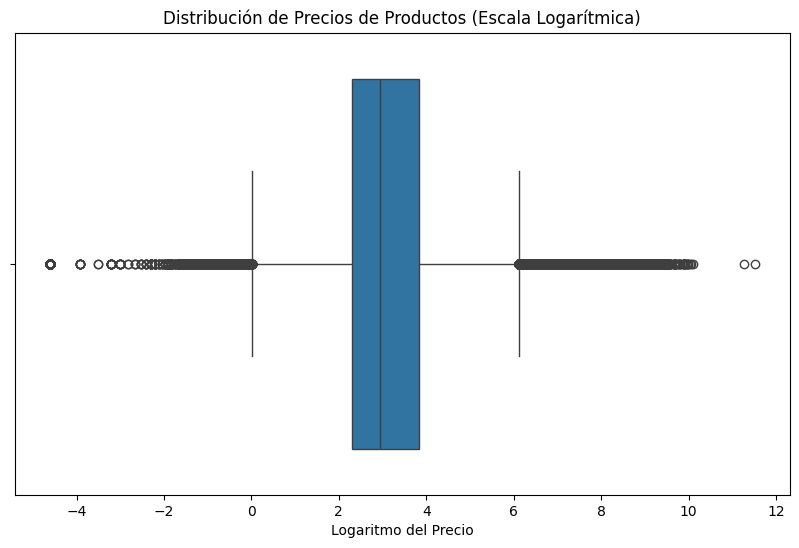

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=np.log(df['price']))
plt.title('Distribución de Precios de Productos (Escala Logarítmica)')
plt.xlabel('Logaritmo del Precio')
plt.show()

In [17]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()

print(f"Average: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating[0]}") #Por si la moda tiene mas de 1 valor

Average: 2.152836472966065
Median: 0.0
Mode: 0.0


In [18]:
df['stars'].max()

np.float64(5.0)

In [19]:
"there is a tendency to low rating"

'there is a tendency to low rating'

In [20]:
var_rating = df['stars'].var()
std_rating = df['stars'].std()


Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
IQR_rating = Q3 - Q1

print(f"Variance: {var_rating}") 
print(f"Standard deviation: {std_rating}") 
print(f"IQR: {IQR_rating}")

Variance: 4.817434029796862
Standard deviation: 2.1948653785134207
IQR: 4.4


In [ ]:
"Hay una ampplia variacion en las puntuaciones, ya que la desviacion estandar y sobretodo el IQR es bastante alto, casi 5"

In [ ]:
from scipy.stats import skew, kurtosis

stars_skewness = skew(df['stars'])
stars_kurtosis = kurtosis(df['stars'], fisher=False)  # fisher=False para obtener kurtosis tradicional, no centrada

print("Asimetría (Skewness) de las puntuaciones:", stars_skewness)
print("Curtosis (Kurtosis) de las puntuaciones:", stars_kurtosis)



Asimetría (Skewness) de las puntuaciones: 0.08120730776283354
Curtosis (Kurtosis) de las puntuaciones: 1.073995357450161


In [ ]:
"Tiene asimetria (skewness) positiva, por lo que indica una cola mas larga por la derecha. Además la curtosis es menor que 3 por lo que tiende a valores más bajo que la normal"

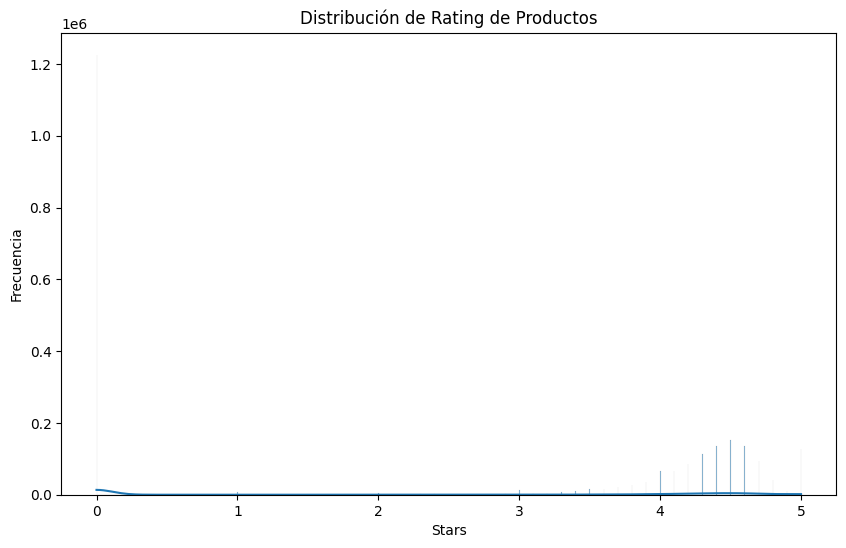

In [24]:
num_bins_st = int(np.ceil(np.sqrt(len(df['stars']))))

plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=num_bins_st, kde=True)
plt.title('Distribución de Rating de Productos')
plt.xlabel('Stars')
plt.ylabel('Frecuencia')
plt.show()